Importing libraries

In [9]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

Generating Data

In [10]:
x1 = 10+2*random.random((1000,1))
x2 = 1+3*random.random((1000,1))
sig = 0.3
noise = random.randn(1000)*sig
y = sin(2*pi*x1[:,0])+cos(2*pi*x2[:,0])+noise
X = concatenate((x1,x2),axis=1)
del x1,x2
X,X_test = X[:800,:] , X[800:,:]
y,y_test = y[:800] , y[800:]

Plotting to figure out some crude relationship by inspection (although here we already know the relationship)

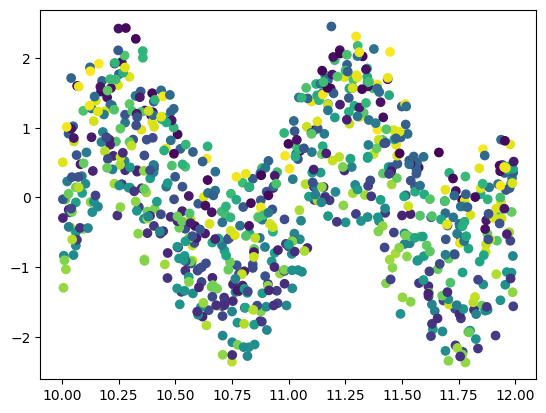

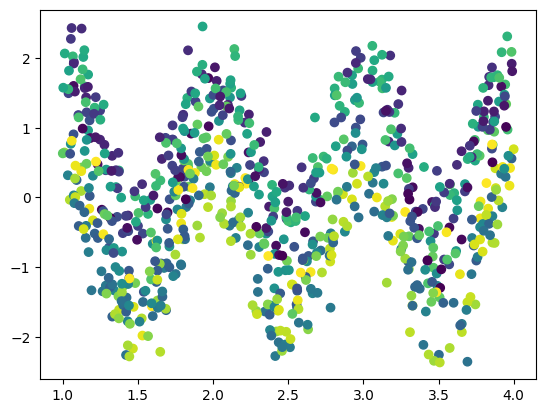

In [11]:
scatter(X[:,0],y,c=X[:,1])
figure()
scatter(X[:,1],y,c=X[:,0])

Now that we have figured out that the relationship is sinusoidal, we can assume that y = a sin(x1) + b sin(x2) + c cos(x1) + d cos(x2) and find the best values of a,b,c,d.

In [12]:
def f(X):
    X = 2*pi*X
    return concatenate((sin(X[:,newaxis,0]),sin(X[:,newaxis,1]),cos(X[:,newaxis,0]),cos(X[:,newaxis,1])),axis=1)
F = f(X)
theta = dot(linalg.inv(F.T @ F) @ F.T ,y)
print(theta)

[ 1.02137996 -0.00515224 -0.05019073  1.02662538]


Predicting the values

In [13]:
def predict(X):
    global theta
    F = f(X)
    return dot(F,theta)
print("The error is :")
y_pred = predict(X_test)
print(mean((y_pred-y_test)**2))

The error is :
0.09683797274423349


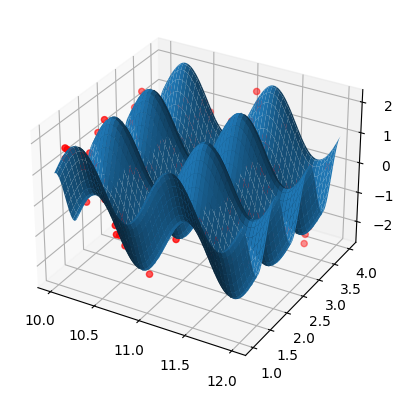

In [14]:
#%matplotlib
fig = figure()
ax = fig.add_subplot(projection='3d')
X1 = tile(array([linspace(10,12,100)]),(100,1)) 
X2 = tile(array([linspace(1,4,100)]),(100,1)).T
Y = array([[predict(array([[X1[i,j],X2[i,j]]]))[0] for j in range(100)] for i in range(100)])
ax.plot_surface(X1,X2,Y,alpha=1)
ax.scatter3D(X_test[:,0],X_test[:,1],y_test,c='red')


Another example: approximating as a polynomial

Generating data

In [15]:
x = (2*random.random(100) - 1)*pi
x = x[:,newaxis]
X = ones((100,1))
for n in range(1,4):
    X = concatenate((X,x**n),axis=1)
y = sin(x) 

We'll consider the values of x,x^2,x^3, and so on to be the conditions/features, and values of y to be observations

[ 0.01508739  0.85071025 -0.00283029 -0.09259996]


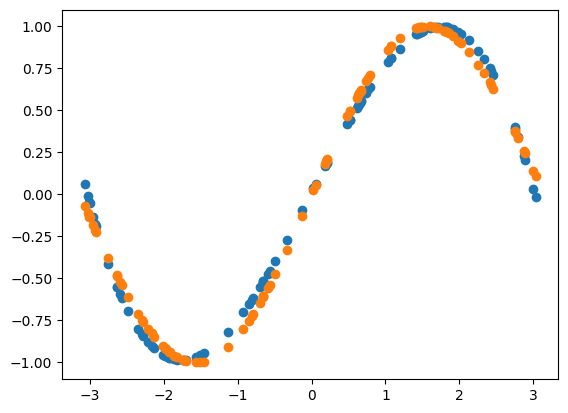

In [16]:
theta = dot(linalg.inv(X.T @ X) @ X.T ,y)[:,0]
print(theta)
y_pred = [dot(theta,X[i]) for i in range(shape(X)[0])]
plot(x[:,0],y_pred,'o')
plot(x[:,0],y[:,0],'o')